# Exploratory Data Analysis - Global Air Pollution

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## initial visualization on data

In [38]:
df = pd.read_csv("global air pollution dataset.csv")

print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None
                         Country    City     AQI Value AQI Category  \
count                      23036   23462  23463.000000        23463   
unique                

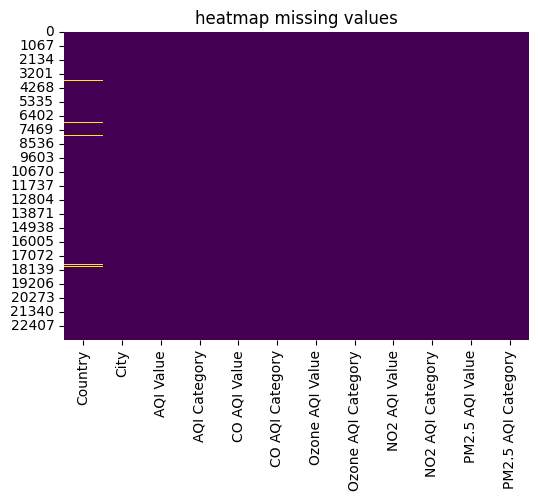

missing values per kolom:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [39]:
#cek missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("heatmap missing values")
plt.show()

print("missing values per kolom:")
print(df.isna().sum())


In [40]:
#drop rows yang kosong di column country
df = df.dropna(subset=["Country"])
df = df.dropna(subset=["City"])
print(df.isna().sum())
df.info()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Valu

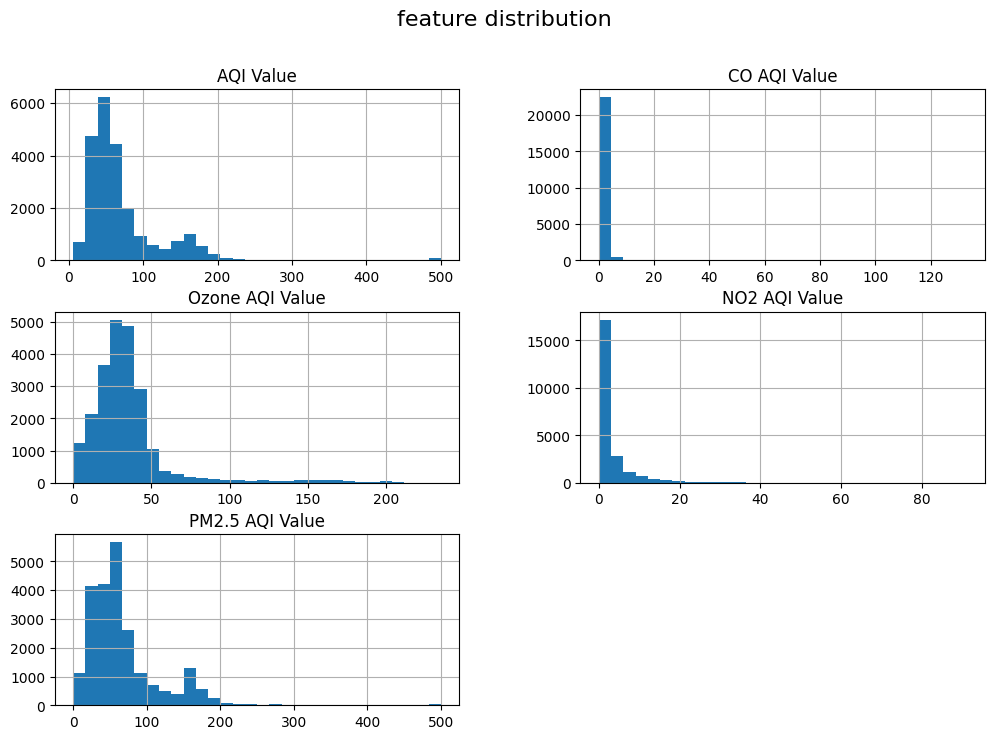

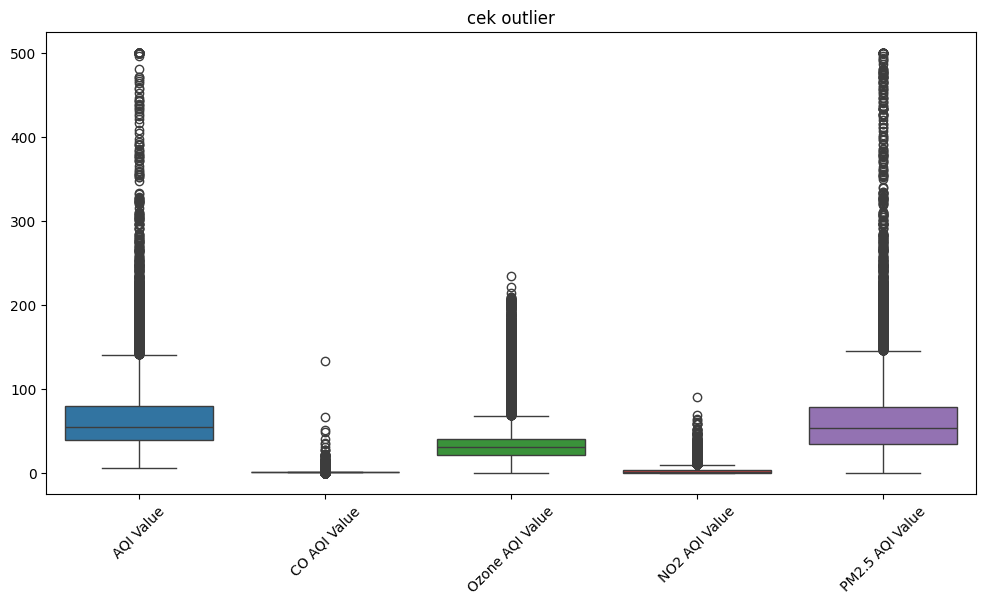

In [41]:
num_cols = df.select_dtypes(include=np.number).columns

# Histogram
df[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("feature distribution", fontsize=16)
plt.show()

# Boxplot per fitur
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("cek outlier")
plt.show()


sebagian besar kota dalam dataset memiliki kualitas udara yang relatif baik hingga sedang, terlihat dari distribusi AQI dan polutan yang terkonsentrasi pada nilai rendah. Namun, terdapat outlier signifikan dengan nilai polusi sangat tinggi, yang menunjukkan adanya kota-kota dengan masalah polusi serius. Hal ini menarik untuk dianalisis lebih lanjut, misalnya dengan mengidentifikasi negara/kota penyumbang outlier tersebut serta tren polusi dari waktu ke waktu

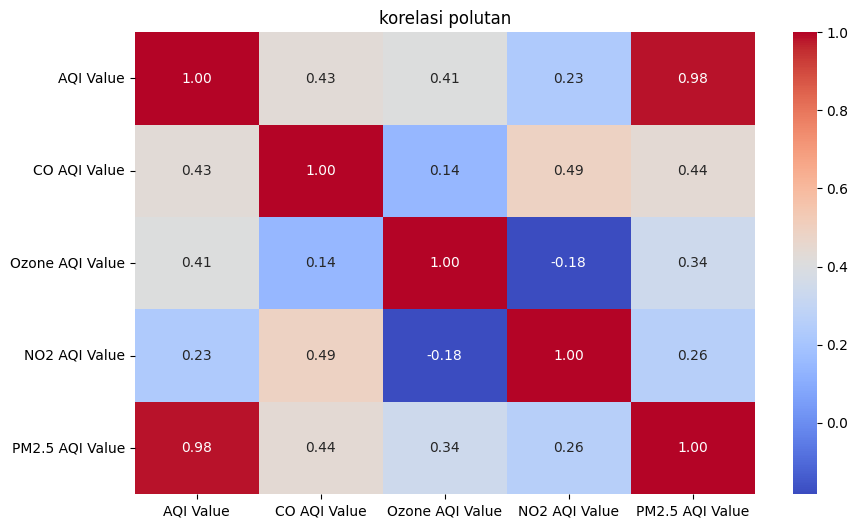

In [42]:
#korelasi antar polutan

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("korelasi polutan")
plt.show()


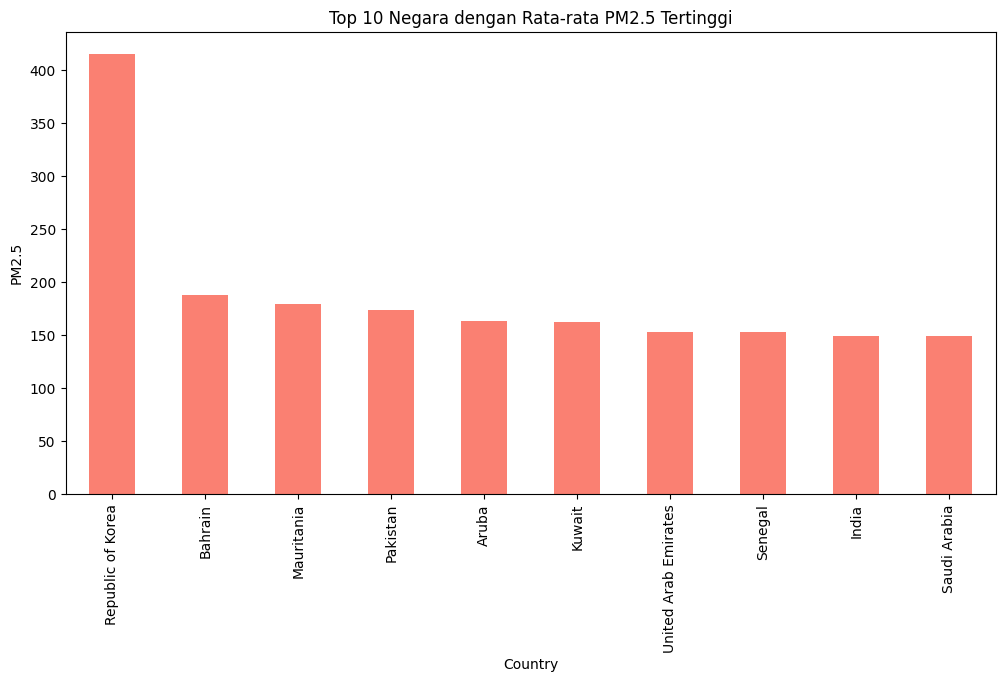

In [43]:
#rata" polusi per negara
avg_country = df.groupby("Country")[num_cols].mean().sort_values("PM2.5 AQI Value", ascending=False)

plt.figure(figsize=(12,6))
avg_country["PM2.5 AQI Value"].head(10).plot(kind="bar", color="salmon")
plt.title("Top 10 Negara dengan Rata-rata PM2.5 Tertinggi")
plt.ylabel("PM2.5")
plt.show()


kualitas udara global relatif baik di sebagian besar kota, namun terdapat “hotspot” polusi serius yang ditandai dengan PM2.5 sangat tinggi. Inilah yang paling berdampak pada kesehatan manusia dan kualitas lingkungan.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [45]:
#ngubah yg 'object' biar data bisa diproses

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['AQI Category'] = le.fit_transform(df['AQI Category'])
df['CO AQI Category'] = le.fit_transform(df['CO AQI Category'])
df['Ozone AQI Category'] = le.fit_transform(df['Ozone AQI Category'])
df['NO2 AQI Category'] = le.fit_transform(df['NO2 AQI Category'])
df['PM2.5 AQI Category'] = le.fit_transform(df['PM2.5 AQI Category'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Country             23035 non-null  int64
 1   City                23035 non-null  int64
 2   AQI Value           23035 non-null  int64
 3   AQI Category        23035 non-null  int64
 4   CO AQI Value        23035 non-null  int64
 5   CO AQI Category     23035 non-null  int64
 6   Ozone AQI Value     23035 non-null  int64
 7   Ozone AQI Category  23035 non-null  int64
 8   NO2 AQI Value       23035 non-null  int64
 9   NO2 AQI Category    23035 non-null  int64
 10  PM2.5 AQI Value     23035 non-null  int64
 11  PM2.5 AQI Category  23035 non-null  int64
dtypes: int64(12)
memory usage: 2.3 MB


In [46]:
df.to_csv('cleanedData.csv', index=False)